In [1]:
def turun(x, a, b):
    return max(min((b - x) / (b - a), 1), 0)

def naik(x, a, b):
    return max(min((x - a) / (b - a), 1), 0)

def tetap(x, a, b, c):
    return max(min((x - a) / (b - a), 1, (c - x) / (c - b)), 0)

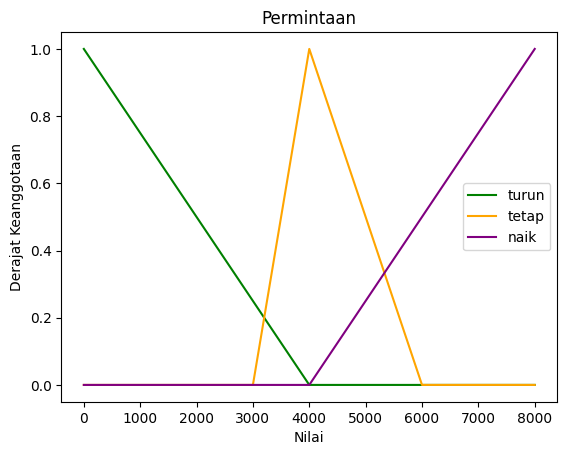

In [2]:
import matplotlib.pyplot as plt

# Fungsi keanggotaan
def turun(x, a, b):
    return max(min((b - x) / (b - a), 1), 0)

def naik(x, a, b):
    return max(min((x - a) / (b - a), 1), 0)

def tetap(x, a, b, c):
    return max(min((x - a) / (b - a), 1, (c - x) / (c - b)), 0)

# Grafik Permintaan
x_permintaan = list(range(0, 8001, 100))
turun_permintaan = [turun(x, 0, 4000) for x in x_permintaan]
tetap_permintaan = [tetap(x, 3000, 4000, 6000) for x in x_permintaan]
naik_permintaan = [naik(x, 4000, 8000) for x in x_permintaan]

plt.plot(x_permintaan, turun_permintaan, label="turun", color="green")
plt.plot(x_permintaan, tetap_permintaan, label="tetap", color="orange")
plt.plot(x_permintaan, naik_permintaan, label="naik", color="purple")
plt.title("Permintaan")
plt.xlabel("Nilai")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()


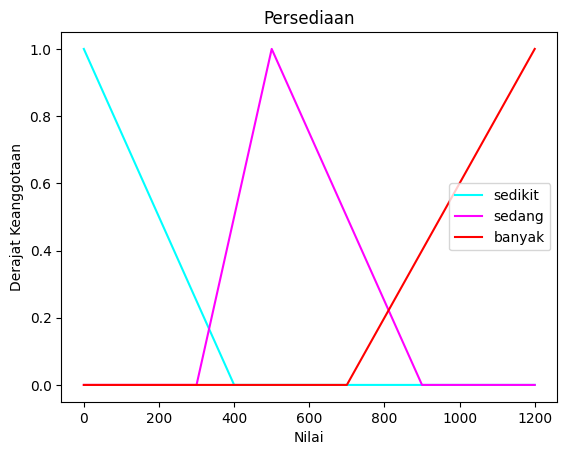

In [3]:
import matplotlib.pyplot as plt

# Fungsi keanggotaan
def turun(x, a, b):
    return max(min((b - x) / (b - a), 1), 0)

def naik(x, a, b):
    return max(min((x - a) / (b - a), 1), 0)

def tetap(x, a, b, c):
    return max(min((x - a) / (b - a), 1, (c - x) / (c - b)), 0)

# Grafik Persediaan
x_persediaan = list(range(0, 1201, 10))
sedikit_persediaan = [turun(x, 0, 400) for x in x_persediaan]
sedang_persediaan = [tetap(x, 300, 500, 900) for x in x_persediaan]
banyak_persediaan = [naik(x, 700, 1200) for x in x_persediaan]

plt.plot(x_persediaan, sedikit_persediaan, label="sedikit", color="cyan")
plt.plot(x_persediaan, sedang_persediaan, label="sedang", color="magenta")
plt.plot(x_persediaan, banyak_persediaan, label="banyak", color="red")
plt.title("Persediaan")
plt.xlabel("Nilai")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()


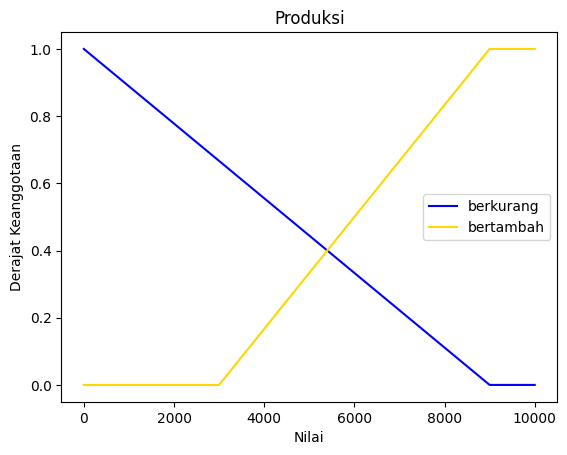

Produksi Output: 5000.00


In [4]:
import matplotlib.pyplot as plt

# Fungsi keanggotaan
def turun(x, a, b):
    return max(min((b - x) / (b - a), 1), 0)

def naik(x, a, b):
    return max(min((x - a) / (b - a), 1), 0)

# Grafik Produksi
x_produksi = list(range(0, 10001, 100))
berkurang_produksi = [turun(x, 0, 9000) for x in x_produksi]
bertambah_produksi = [naik(x, 3000, 9000) for x in x_produksi]

plt.plot(x_produksi, berkurang_produksi, label="berkurang", color="blue")
plt.plot(x_produksi, bertambah_produksi, label="bertambah", color="gold")
plt.title("Produksi")
plt.xlabel("Nilai")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()

# Implementasi Fuzzy dengan metode Tsukamoto
def fuzzy_inference(permintaan, persediaan):
    # Derajat keanggotaan
    μ_turun = turun(permintaan, 0, 4000)
    μ_tetap = tetap(permintaan, 3000, 4000, 6000)
    μ_naik = naik(permintaan, 4000, 8000)

    μ_sedikit = turun(persediaan, 0, 400)
    μ_sedang = tetap(persediaan, 300, 500, 900)
    μ_banyak = naik(persediaan, 700, 1200)

    # Aturan fuzzy
    rules = [
        (min(μ_turun, μ_sedikit), "bertambah"),
        (min(μ_turun, μ_sedang), "berkurang"),
        (min(μ_turun, μ_banyak), "berkurang"),
        (min(μ_tetap, μ_sedikit), "bertambah"),
        (min(μ_tetap, μ_sedang), "berkurang"),
        (min(μ_tetap, μ_banyak), "berkurang"),
        (min(μ_naik, μ_sedikit), "bertambah"),
        (min(μ_naik, μ_sedang), "bertambah"),
        (min(μ_naik, μ_banyak), "berkurang")
    ]

    # Perhitungan produksi
    total_weight = 0
    total_value = 0
    for weight, result in rules:
        if result == "bertambah":
            value = 9000 * weight
        else:  # berkurang
            value = 3000 * weight
        total_weight += weight
        total_value += value

    return total_value / total_weight if total_weight != 0 else 0

# Input nilai
permintaan_input = 5000  # Nilai permintaan
persediaan_input = 600   # Nilai persediaan

produksi_output = fuzzy_inference(permintaan_input, persediaan_input)

# Cetak hasil
print(f"Produksi Output: {produksi_output:.2f}")
